In [3]:
from google.colab import files
uploaded = files.upload()

Saving Boston.csv to Boston.csv


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
df = pd.read_csv("Boston.csv", header=0)
df.head()

,age,B,chas,cmedv,crim,dis,indus,lat,lon,lstat,medv,nox,obs,ptratio,rad,rm,tax,zn
0,65.2,396.90,0,24.0,0.00632,4.0900,2.31,42.2550,-70.955,4.98,24.0,0.538,1,15.3,1,6.575,296,18.0
1,78.9,396.90,0,21.6,0.02731,4.9671,7.07,42.2875,-70.950,9.14,21.6,0.469,2,17.8,2,6.421,242,0.0
2,61.1,392.83,0,34.7,0.02729,4.9671,7.07,42.2830,-70.936,4.03,34.7,0.469,3,17.8,2,7.185,242,0.0
3,45.8,394.63,0,33.4,0.03237,6.0622,2.18,42.2930,-70.928,2.94,33.4,0.458,4,18.7,3,6.998,222,0.0
4,54.2,396.90,0,36.2,0.06905,6.0622,2.18,42.2980,-70.922,5.33,36.2,0.458,5,18.7,3,7.147,222,0.0


In [8]:
df.shape

(506, 18)

In [9]:
#statistical summary of the dataset
df.describe()

,age,B,chas,cmedv,crim,dis,indus,lat,lon,lstat,medv,nox,obs,ptratio,rad,rm,tax,zn
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,0.069170,22.528854,3.613524,3.795043,11.136779,42.216440,-71.056389,12.653063,22.532806,0.554695,253.500000,18.455534,9.549407,6.284634,408.237154,11.363636
std,28.148861,91.294864,0.253994,9.182176,8.601545,2.105710,6.860353,0.061777,0.075405,7.141062,9.197104,0.115878,146.213884,2.164946,8.707259,0.702617,168.537116,23.322453
min,2.900000,0.320000,0.000000,5.000000,0.006320,1.129600,0.460000,42.030000,-71.289500,1.730000,5.000000,0.385000,1.000000,12.600000,1.000000,3.561000,187.000000,0.000000
25%,45.025000,375.377500,0.000000,17.025000,0.082045,2.100175,5.190000,42.180775,-71.093225,6.950000,17.025000,0.449000,127.250000,17.400000,4.000000,5.885500,279.000000,0.000000
50%,77.500000,391.440000,0.000000,21.200000,0.256510,3.207450,9.690000,42.218100,-71.052900,11.360000,21.200000,0.538000,253.500000,19.050000,5.000000,6.208500,330.000000,0.000000
75%,94.075000,396.225000,0.000000,25.000000,3.677082,5.188425,18.100000,42.252250,-71.019625,16.955000,25.000000,0.624000,379.750000,20.200000,24.000000,6.623500,666.000000,12.500000
max,100.000000,396.900000,1.000000,50.000000,88.976200,12.126500,27.740000,42.381000,-70.810000,37.970000,50.000000,0.871000,506.000000,22.000000,24.000000,8.780000,711.000000,100.000000


In [10]:
#checking whether dataset contains missing value
df.isna()

,age,B,chas,cmedv,crim,dis,indus,lat,lon,lstat,medv,nox,obs,ptratio,rad,rm,tax,zn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
#checking the count of missing values(if any)
df.isna().sum()

age        0
B          0
chas       0
cmedv      0
crim       0
dis        0
indus      0
lat        0
lon        0
lstat      0
medv       0
nox        0
obs        0
ptratio    0
rad        0
rm         0
tax        0
zn         0
dtype: int64

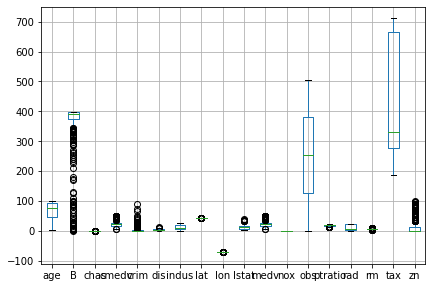

In [81]:
df = pd.read_csv('Boston.csv')
df.boxplot(column=df.columns.to_list())
plt.tight_layout(pad=0.7, w_pad=0.6, h_pad=8.0)

age         49.050000
B           20.847500
chas         0.000000
cmedv        7.975000
crim         3.595037
dis          3.088250
indus       12.910000
lat          0.071475
lon          0.073600
lstat       10.005000
medv         7.975000
nox          0.175000
obs        252.500000
ptratio      2.800000
rad         20.000000
rm           0.738000
tax        387.000000
zn          12.500000
dtype: float64
      age       B  chas  cmedv     crim  ...  ptratio  rad     rm  tax    zn
0    65.2  396.90     0   24.0  0.00632  ...     15.3    1  6.575  296  18.0
1    78.9  396.90     0   21.6  0.02731  ...     17.8    2  6.421  242   0.0
2    61.1  392.83     0   34.7  0.02729  ...     17.8    2  7.185  242   0.0
3    45.8  394.63     0   33.4  0.03237  ...     18.7    3  6.998  222   0.0
4    54.2  396.90     0   36.2  0.06905  ...     18.7    3  7.147  222   0.0
..    ...     ...   ...    ...      ...  ...      ...  ...    ...  ...   ...
501  69.1  391.99     0   22.4  0.06263  ...     2

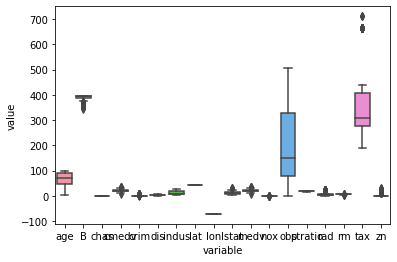

In [82]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_clean)

sns.boxplot(x="variable", y="value", data=pd.melt(df_clean))

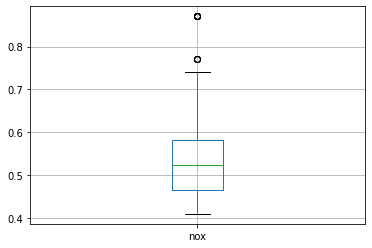

In [83]:
 df_clean.boxplot(column=['nox'], return_type='axes');

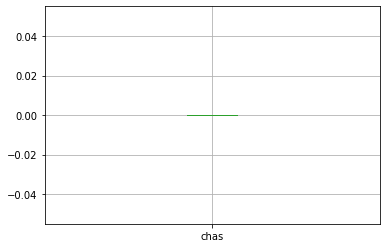

In [84]:
df_clean.boxplot(column=['chas'], return_type='axes');

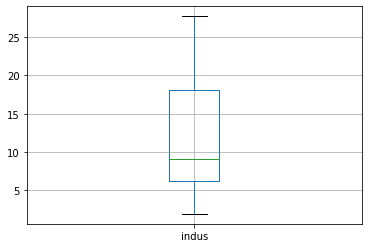

In [85]:
df_clean.boxplot(column=['indus'], return_type='axes');

In [86]:
df_clean.describe()

,age,B,chas,cmedv,crim,dis,indus,lat,lon,lstat,medv,nox,obs,ptratio,rad,rm,tax,zn
count,252.000000,252.000000,252.0,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,67.645238,389.371468,0.0,21.277778,1.077936,3.777594,11.011230,42.232924,-71.036844,12.167500,21.265873,0.540602,209.710317,18.824206,7.055556,6.154813,365.301587,2.761905
std,26.012448,11.206773,0.0,4.702130,2.009554,1.539430,6.383426,0.062497,0.059364,5.441714,4.724618,0.096523,158.684757,1.782163,6.950371,0.425391,143.997138,7.335232
min,2.900000,344.910000,0.0,8.500000,0.006320,1.345900,1.890000,42.082500,-71.203500,2.940000,8.500000,0.409000,1.000000,14.700000,1.000000,4.903000,188.000000,0.000000
25%,47.075000,387.877500,0.0,18.650000,0.086420,2.468200,6.167500,42.183750,-71.080100,7.982500,18.500000,0.464000,78.750000,17.800000,4.000000,5.883750,277.000000,0.000000
50%,72.600000,393.895000,0.0,21.000000,0.174180,3.550400,9.125000,42.239750,-71.037350,11.395000,21.000000,0.524000,150.500000,19.100000,5.000000,6.121500,307.000000,0.000000
75%,91.125000,396.900000,0.0,23.450000,0.646448,4.850925,18.100000,42.281150,-70.989875,14.992500,23.450000,0.581000,329.250000,20.200000,6.000000,6.415250,407.750000,0.000000
max,100.000000,396.900000,0.0,36.200000,8.716750,8.013600,27.740000,42.346000,-70.915000,30.810000,36.200000,0.871000,506.000000,21.200000,24.000000,7.416000,711.000000,30.000000


**K-MEANS CLUSTERING**

DECIMAL SCALING 


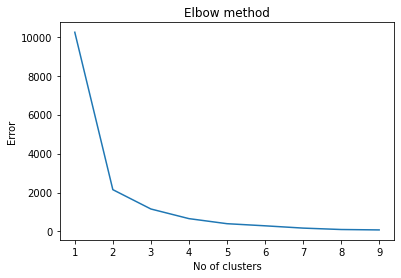

In [87]:
data=pd.DataFrame()

# Perform Decimal Scaling

print("DECIMAL SCALING ")
data["nox"] = df_clean['nox']
data["indus"]=df_clean['indus']
x = data.iloc[0:, [0,1]].values
Error =[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt

plt.plot(range(1, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

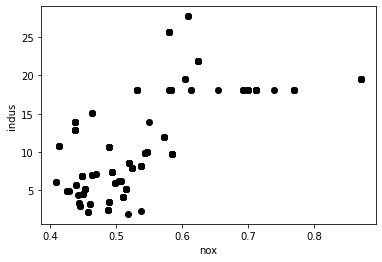

In [88]:
x = data[["indus","nox"]]
#Visualise data points
plt.scatter(x["nox"],x["indus"],c='black')
plt.xlabel('nox')
plt.ylabel('indus')
plt.show()

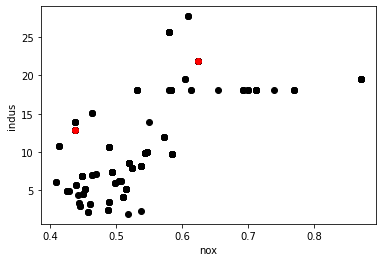

In [89]:
#number of clusters
K=2

# Select random observation as centroids
Centroids = (x.sample(n=K))
plt.scatter(x["nox"],x["indus"],c='black')
plt.scatter(Centroids["nox"],Centroids["indus"],c='red')
plt.xlabel('nox')
plt.ylabel('indus')
plt.show()

In [90]:
diff = 1
j=0

while(diff!=0):
    XD=x
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["nox"]-row_d["nox"])**2
            d2=(row_c["indus"]-row_d["indus"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        x[i]=ED
        i=i+1

    C=[]
    for index,row in x.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    x["Cluster"]=C
    Centroids_new = x.groupby(["Cluster"]).mean()[["indus","nox"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['indus'] - Centroids['indus']).sum() + (Centroids_new['nox'] - Centroids['nox']).sum()
        print(diff.sum())
    Centroids = x.groupby(["Cluster"]).mean()[["indus","nox"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


-0.3510228363561459
-0.7107727205907568
0.0


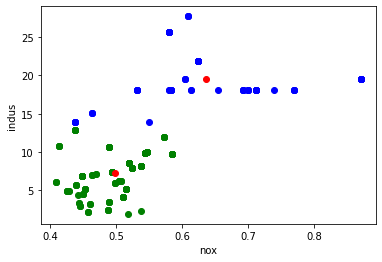

In [91]:
color=['blue','green','yellow']
for k in range(K):
    data=x[x["Cluster"]==k+1]
    plt.scatter(data["nox"],data["indus"],c=color[k])
plt.scatter(Centroids["nox"],Centroids["indus"],c='red')
plt.xlabel('nox')
plt.ylabel('indus')
plt.show()

**Interpretation**

When industrial area was less, the pollution was less and vice versa.

**AGNES CLUSTERING**

In [63]:
data = df.iloc[:, 3:5].values

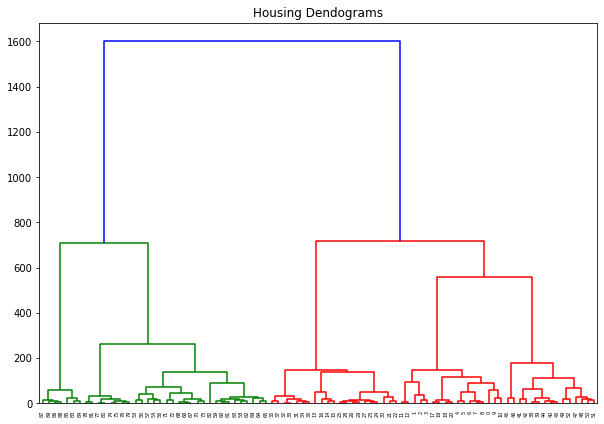

In [64]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Housing Dendograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

In [ ]:
plt.figure()

In [66]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([2, 0, 1, 3, 2, 3, 1, 0, 1, 0, 0, 3, 4, 3, 1, 1, 1, 3, 2, 4, 4, 2,
       2, 0, 1, 0, 0, 1, 1, 0, 1, 4, 0, 0, 0, 1, 0, 0, 4, 3, 4, 2, 4, 3,
       2, 2, 2, 4, 3, 4, 2, 3, 2, 3, 1, 2, 2, 1, 1, 0, 1, 3, 0, 0, 1, 4,
       3, 4, 1, 0, 3, 3, 4, 4, 4, 1, 1, 0, 0, 1, 0, 0, 0, 1, 3, 4, 0, 1,
       0, 0])

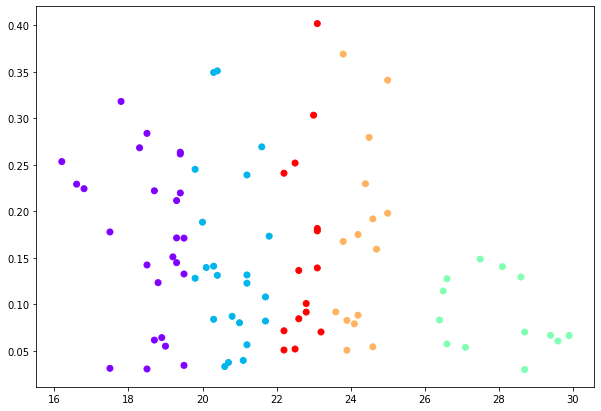

In [67]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

As we can see the data points in the form of five clusters. The data points in the bottom right belong to the industries with low NOX. Similarly, the industries at top (red and orange data points), these are the industries with high NOX. These are the type of customers that companies target. The customers in the middle (blue data points) are the ones with average income and average salaries. The highest numbers of customers belong to this category. Companies can also target these customers given the fact that they are in huge numbers, etc.